# PyMVPD LITE Tutorial

This is a tutorial of how to perform MultiVariate Pattern Dependence (MVPD) analysis using linear regression models. The tutorial will walk you through analysis specification, data loading and finally analysis execution.

In [1]:
import os, sys
sys.path.append("..")
from mvpdlite import data_loading, model_exec

## Step 1 - Analysis Specification

The first step of MVPD analysis is to enter the required input information and to specify the MVPD model parameters.

Check the full list of input variables and available model parameters [here:](https://github.com/sccnlab/PyMVPD_LITE/blob/main/README.md)

In [2]:
# Here we test the L2_LR model on the test data from sub-01.

# Model Input Info
inputinfo=data_loading.structtype()
## subject/participant
inputinfo.sub='sub-01'
## functional data
inputinfo.filepath_func=[]
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run1.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run2.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run3.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run4.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run5.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run6.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run7.nii.gz']
inputinfo.filepath_func+=['./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run8.nii.gz']
## predictor ROI mask
inputinfo.filepath_mask1='./testdata/'+inputinfo.sub+'/'+inputinfo.sub+'_FFA_80vox_bin.nii.gz'
## target ROI mask
inputinfo.filepath_mask2='./testdata/GM_thr0.1_bin.nii.gz'
## save settings
inputinfo.roidata_save_dir='./testdata/'+inputinfo.sub+'_roi_data/'
inputinfo.results_save_dir='./results/'
inputinfo.save_prediction=False # whether to save the model prediction of the timecourses in the target ROI, False(default)

In [3]:
# MVPD Model Parameters
params=data_loading.structtype()
## cross validation: leave k run out
params.leave_k=1 # leave one run out(default)
## dimensionality reduction
params.dim_reduction=False # False(default)
## regularization 
params.lin_reg=True # False(default)
params.reg_type='Ridge' # ['Ridge'(default), 'Lasso', 'RidgeCV']
params.reg_strength=0.001 # regularization strength, default=0.001

## Step 2 - Data Loading

In [4]:
data_loading.load_data(inputinfo)

total_run: 8
start loading data of sub-01
loading data in run 1
loading data in run 2
loading data in run 3
loading data in run 4
loading data in run 5
loading data in run 6
loading data in run 7
loading data in run 8
data loading done!


## Step 3 - Analysis Execution

In [5]:
model_exec.MVPD_exec(inputinfo, params)

start running MVPD linear regression model for sub-01
total_run: 8
leave_k_run_out: 1
test run: [1]
test run: [2]
test run: [3]
test run: [4]
test run: [5]
test run: [6]
test run: [7]
test run: [8]

average results across runs

done!
inputinfo: {'sub': 'sub-01', 'filepath_func': ['./testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run1.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run2.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run3.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run4.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run5.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run6.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run7.nii.gz', './testdata/sub-01/sub-01_movie_bold_space-MNI152NLin2009cAsy

## Visualizing MVPD results

After running the MVPD model, you can visualize the results (e.g. average variance explained map across experimental runs) using a variety of visualization tools (e.g. Connectome Workbench, Mango, FSLeyes) and perform further statistical analyses.

In [17]:
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

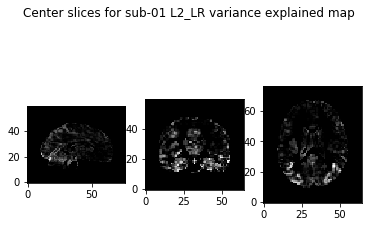

In [21]:
var_expl_img = nib.load(inputinfo.results_save_dir+inputinfo.sub+'_var_expl_map_threshold_avgruns.nii.gz')
var_expl_data = var_expl_img.get_fdata()
var_expl_shape = var_expl_data.shape;
x_center = var_expl_shape[0]//2;
y_center = var_expl_shape[1]//2;
z_center = var_expl_shape[2]//2;

show_slices([var_expl_data[x_center, :, :],
             var_expl_data[:, y_center, :],
             var_expl_data[:, :, z_center]])

plt.suptitle("Center slices for "+inputinfo.sub+" L2_LR variance explained map") 
plt.show()

Here are the example figures generated from our test runs (predictor ROI: FFA, target ROI: GM).

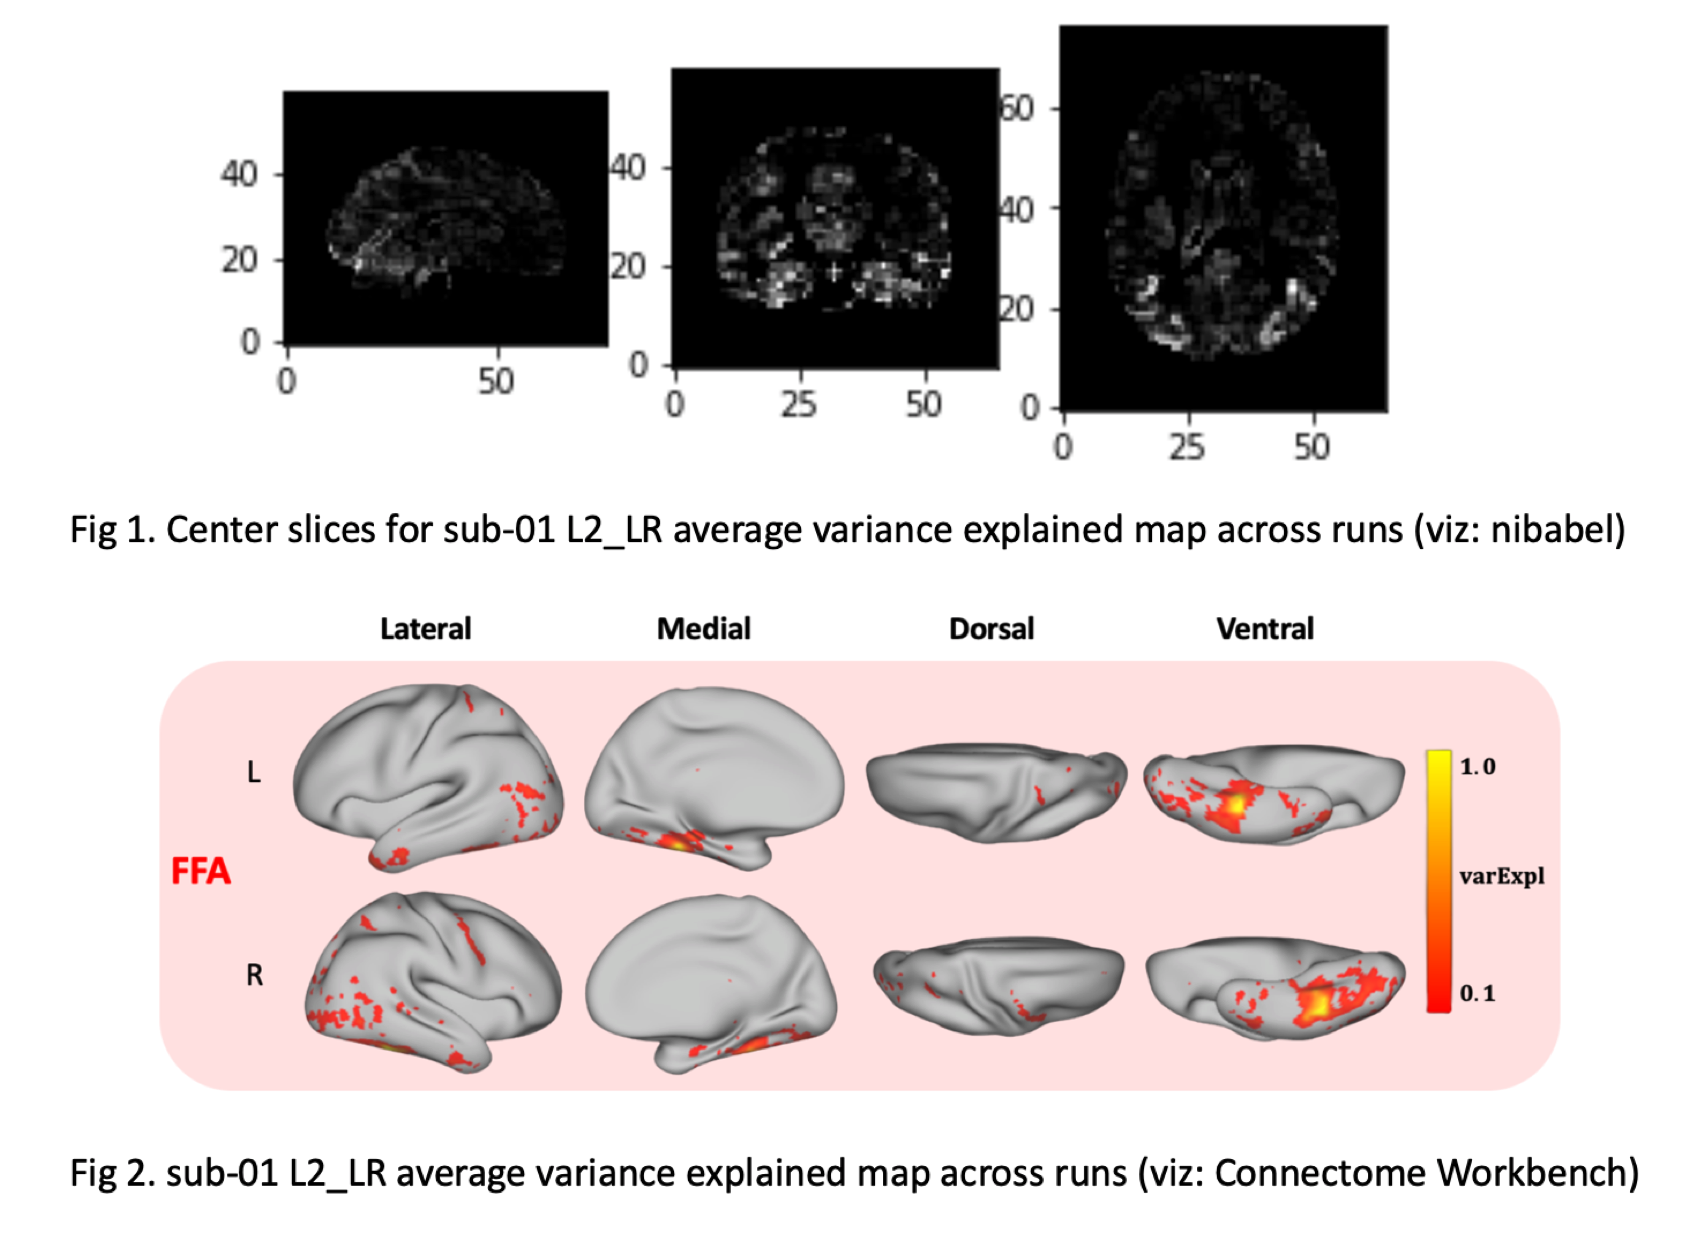

In [27]:
img_path='./sub-01_L2_LR_example_viz_figures.png'
display(Image.open(img_path))

## Unit test on model results

Before running formal models, make sure to pass the unit test on the MVPD L2_LR model with provided test data of sub-01.

In [24]:
import numpy as np
import nibabel as nib

mask_path = './testdata/GM_thr0.1_bin.nii.gz' # path to the mask of target ROI
tgt_path = './sub-01_L2_LR_var_expl_map_threshold_avgruns.nii.gz' # path to the pre-implemented L2_LR variExpl map
pred_path = inputinfo.results_save_dir+inputinfo.sub+'_var_expl_map_threshold_avgruns.nii.gz' # path to the obtained L2_LR variExpl map from running the MVPD model

In [23]:
def img2var(img_path, mask_path):
    """
    Extract the numpy array of variance explained in the target ROI from the corresponding brain image.
    
    INPUT FORMAT
    img_path - the path to the directory containing the brain image of variance explained
    mask_path - the path to the directory conataining the mask of the target ROI
    
    OUTPUT FORMAT
    vari_data - the extracted numpy array of variance explained in the target ROI
    
    """
    img_data = nib.load(img_path).get_fdata()
    mask_data = nib.load(mask_path).get_fdata()
    nozero_idx = np.nonzero(mask_data)
    num_nozero_idx = np.shape(nozero_idx)[1]
    
    vari_data = np.zeros(num_nozero_idx)
    
    for i in range(num_nozero_idx):
        x = nozero_idx[0][i]
        y = nozero_idx[1][i]
        z = nozero_idx[2][i]
        vari_data[i] = img_data[x][y][z]
        
    return vari_data

In [31]:
tgt_vari = img2var(tgt_path, mask_path)
pred_vari = img2var(pred_path, mask_path)

# Pearson product-moment correlation coefficients
corr = np.corrcoef(tgt_vari, pred_vari)[0,1]

print("The Pearson correlation between the variance explained of the pre-implemented L2_LR model and your test model is: ", corr)

if corr > 0.95:
    print("\nThe Pearson correlation is above 0.95. \nYou have passed the unit test!")
else:
    print("\nThe Pearson correlation is not above 0.95. \nYou have failed the unit test. Please check the code before you run formal models.")

The Pearson correlation between the variance explained of the pre-implemented L2_LR model and your test model is:  1.0

The Pearson correlation is above 0.95. 
You have passed the unit test!
